## 01 - Plotting EMD Scores UTSW and Rockefeller

## Imports

In [19]:
import numpy as np
import os
import matplotlib.patches as patches
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

## Load Scores

In [20]:
dir_path = 'C:\\Grad_School\\Code_and_software\\Py_code\\similarity_scoring\\syllable_triplet_network\\syllable_triplet_network\\WhisperSeg_validation\\'

In [21]:
rock_self = pd.read_csv(dir_path + 'Rockefeller_wseg_emds_self_comparisons.csv').drop(columns = 'Unnamed: 0')
rock_other = pd.read_csv(dir_path +'Rockefeller_wseg_emds.csv').drop(columns = 'Unnamed: 0')
rock_full = pd.concat([rock_other, rock_self])

In [22]:
utsw_self = pd.read_csv(dir_path + '54_emd_Dec_4_01_emds_wseg_self_comparison.csv').drop(columns = 'Unnamed: 0')
utsw_other = pd.read_csv(dir_path + '54_emd_Dec_4_01_emds_wseg.csv').drop(columns = 'Unnamed: 0')
utsw_full = pd.concat([utsw_other, utsw_self])
utsw_full = utsw_full[utsw_full.Bird_ID != 'S389']

## Plot UTSW Distributions

In [23]:
pairs_df = pd.read_csv("C:/Grad_School/Code_and_software/Py_code/similarity_scoring/tut_pupil_pairs_April_2022.csv")
pairs_df = pairs_df[pairs_df.Include == 1]

FP1_birds = pairs_df[pairs_df.Bird_Condition == "FP1KD_pre_tut"].Bird_ID

In [24]:
utsw_full["comparison_type"] = "Pupil vs. Unrelated Bird"
utsw_full.loc[utsw_full["Tutor-pupil"], "comparison_type"] = "Pupil vs. Tutor"
utsw_full.loc[utsw_full["Same_tut"], "comparison_type"] = "Pupil vs. 'Sibling'"
utsw_full.loc[utsw_full["Self_comparison"], "comparison_type"] = "Pupil vs. Itself"

In [25]:
utsw_full.comparison_type = utsw_full.comparison_type.astype("category")
utsw_full.comparison_type = utsw_full.comparison_type.cat.reorder_categories(["Pupil vs. Itself",
                                                                "Pupil vs. Tutor", 
                                                                "Pupil vs. 'Sibling'", 
                                                                "Pupil vs. Unrelated Bird"])

In [26]:
utsw_typical = utsw_full[~utsw_full.Bird_ID.isin(FP1_birds)].reset_index()
utsw_fp1 = utsw_full[utsw_full.Bird_ID.isin(FP1_birds)].reset_index()

In [27]:
utsw_typical

,index,Bird_ID,Comparison_Bird_ID,Tutor_ID,Same_tut,Tutor-pupil,Self_comparison,EMD,comparison_type
0,0,G402,O314,O314,False,True,False,0.581091,Pupil vs. Tutor
1,1,G402,O630,O314,False,False,False,0.853986,Pupil vs. Unrelated Bird
2,2,G402,O670,O314,False,False,False,0.879306,Pupil vs. Unrelated Bird
3,3,G402,Y433,O314,False,False,False,0.808478,Pupil vs. Unrelated Bird
4,4,G402,B555,O314,True,False,False,0.657966,Pupil vs. 'Sibling'
...,...,...,...,...,...,...,...,...,...
205,31,S565,S565,G307,False,False,True,0.172564,Pupil vs. Itself
206,32,B646,B646,O411,False,False,True,0.261087,Pupil vs. Itself
207,33,O670,O670,O411,False,False,True,0.494878,Pupil vs. Itself
208,34,R646,R646,R308,False,False,True,0.180749,Pupil vs. Itself


In [28]:
utsw_typical.groupby('comparison_type').count()

,index,Bird_ID,Comparison_Bird_ID,Tutor_ID,Same_tut,Tutor-pupil,Self_comparison,EMD
comparison_type,,,,,,,,
Pupil vs. Itself,30,30,30,30,30,30,30,30
Pupil vs. Tutor,30,30,30,30,30,30,30,30
Pupil vs. 'Sibling',60,60,60,60,60,60,60,60
Pupil vs. Unrelated Bird,90,90,90,90,90,90,90,90


In [17]:
bird_ids = utsw_typical.Bird_ID.unique()
bird_ids.sort()
bird_ids

array(['B447', 'B555', 'B573', 'B646', 'G402', 'G528', 'G555', 'G587',
       'G592', 'G668', 'O434', 'O510', 'O630', 'O670', 'R402', 'R469',
       'R509', 'R623', 'R629', 'R646', 'S525', 'S528', 'S561', 'S565',
       'S636', 'Y354', 'Y433', 'Y561', 'Y653', 'Y654'], dtype=object)

In [15]:
len(bird_ids)

30

In [11]:
plt.rcParams.update({'font.size' : 8})

c:\Users\tkoch\anaconda3\envs\avn4_install_test\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x200 with 0 Axes>

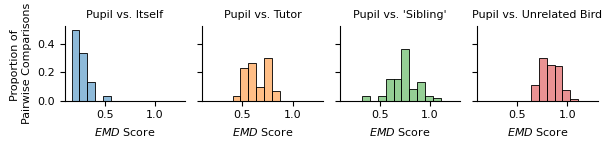

In [16]:
plt.figure(figsize = (4, 2))
g = sns.displot(utsw_typical, x = 'EMD', col = 'comparison_type', hue = 'comparison_type', alpha = 0.5,
                 stat = 'probability', common_norm = False, bins = 12, legend=False, height = 1.5, aspect = 1 ) 
g.set_axis_labels("$EMD$ Score", "Proportion of \nPairwise Comparisons")
g.set_titles("{col_name}");
plt.xlim(0.1, 1.3)
plt.savefig('utsw_emds_across_comparisons.svg', transparent = True)

In [45]:
plt.rcParams.update({'font.size' : 18})

In [16]:
utsw_typical.comparison_type.unique()

['Pupil vs. Tutor', 'Pupil vs. Unrelated Bird', 'Pupil vs. 'Sibling'', 'Pupil vs. Itself']
Categories (4, object): ['Pupil vs. Itself', 'Pupil vs. Tutor', 'Pupil vs. 'Sibling'', 'Pupil vs. Unrelated Bird']

In [17]:
cat_dict = {'Pupil vs. Itself' : 'Pupil vs. Itself', 
            'Pupil vs. Tutor' : 'vs. Tutor', 
            "Pupil vs. 'Sibling'" : 'vs. Sibling', 
            'Pupil vs. Unrelated Bird' : 'vs. Unrelated'}

In [19]:
#utsw_typical.comparison_type = utsw_typical.comparison_type.cat.rename_categories(cat_dict)

c:\Users\tkoch\anaconda3\envs\avn4_install_test\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x200 with 0 Axes>

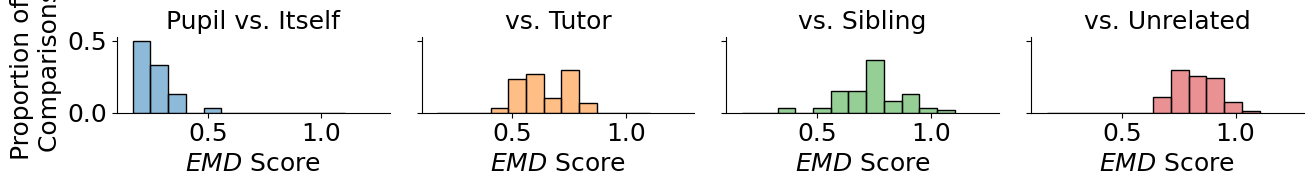

In [32]:
plt.figure(figsize = (12, 2))
g = sns.displot(utsw_typical, x = 'EMD', col = 'comparison_type', hue = 'comparison_type', alpha = 0.5,
                 stat = 'probability', common_norm = False, bins = 12, legend=False, height = 2.2, aspect = 1.5 ) 
g.set_axis_labels("$EMD$ Score", "Proportion of \n Comparisons")
g.set_titles("{col_name}");
plt.xlim(0.1, 1.3)
plt.savefig('poster_utsw_emd_distributions.svg', transparent = True)

In [38]:
utsw_typical.groupby('comparison_type').count()

,index,Bird_ID,Comparison_Bird_ID,Tutor_ID,Same_tut,Tutor-pupil,Self_comparison,EMD
comparison_type,,,,,,,,
Pupil vs. Itself,30,30,30,30,30,30,30,30
Pupil vs. Tutor,30,30,30,30,30,30,30,30
Pupil vs. 'Sibling',60,60,60,60,60,60,60,60
Pupil vs. Unrelated Bird,90,90,90,90,90,90,90,90


c:\Users\tkoch\anaconda3\envs\avn4_install_test\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(0.1, 1.3)

<Figure size 400x200 with 0 Axes>

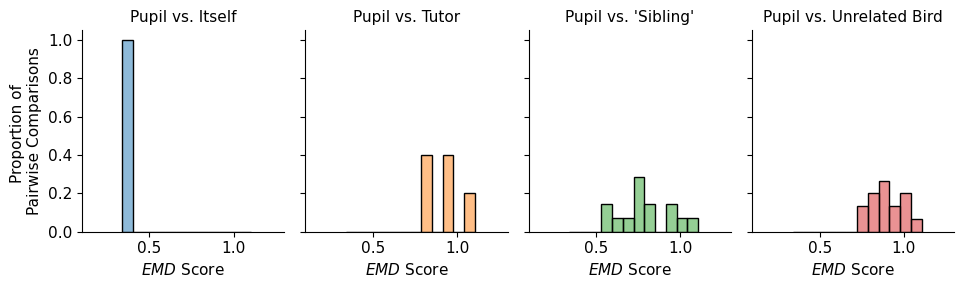

In [32]:
plt.figure(figsize = (4, 2))
g = sns.displot(utsw_fp1, x = 'EMD', col = 'comparison_type', hue = 'comparison_type', alpha = 0.5,
                 stat = 'probability', common_norm = False, bins = 12, legend=False, height = 3, aspect = 0.8 ) 
g.set_axis_labels("$EMD$ Score", "Proportion of \nPairwise Comparisons")
g.set_titles("{col_name}");
plt.xlim(0.1, 1.3)

c:\Users\tkoch\anaconda3\envs\avn4_install_test\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x200 with 0 Axes>

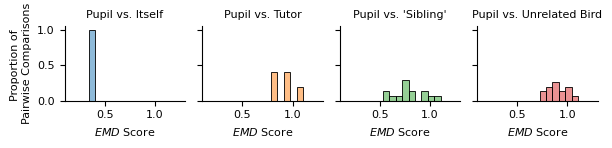

In [18]:
plt.figure(figsize = (4, 2))
g = sns.displot(utsw_fp1, x = 'EMD', col = 'comparison_type', hue = 'comparison_type', alpha = 0.5,
                 stat = 'probability', common_norm = False, bins = 12, legend=False, height = 1.5, aspect = 1 ) 
g.set_axis_labels("$EMD$ Score", "Proportion of \nPairwise Comparisons")
g.set_titles("{col_name}");
plt.xlim(0.1, 1.3)
plt.savefig('fp1_birds_emds_across_comparisons.svg', transparent = True)

In [44]:
utsw_fp1.groupby('comparison_type').count()

,index,Bird_ID,Comparison_Bird_ID,Tutor_ID,Same_tut,Tutor-pupil,Self_comparison,EMD
comparison_type,,,,,,,,
Pupil vs. Itself,5,5,5,5,5,5,5,5
Pupil vs. Tutor,5,5,5,5,5,5,5,5
Pupil vs. 'Sibling',14,14,14,14,14,14,14,14
Pupil vs. Unrelated Bird,15,15,15,15,15,15,15,15


In [18]:
bird_ids = utsw_fp1.Bird_ID.unique()
bird_ids.sort()
bird_ids

array(['B402', 'G413', 'O421', 'S421', 'Y389'], dtype=object)

## Plot Rockefeller Distributions

In [19]:
rock_full["comparison_type"] = "Pupil vs. Unrelated Bird"
rock_full.loc[rock_full["Tutor-pupil"], "comparison_type"] = "Pupil vs. Tutor"
rock_full.loc[rock_full["Same_tut"], "comparison_type"] = "Pupil vs. 'Sibling'"
rock_full.loc[rock_full["Self_comparison"], "comparison_type"] = "Pupil vs. Itself"

In [20]:
rock_full.comparison_type = rock_full.comparison_type.astype("category")
rock_full.comparison_type = rock_full.comparison_type.cat.reorder_categories(["Pupil vs. Itself",
                                                                "Pupil vs. Tutor", 
                                                                "Pupil vs. 'Sibling'", 
                                                                "Pupil vs. Unrelated Bird"])

c:\Users\tkoch\anaconda3\envs\avn4_install_test\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 300x200 with 0 Axes>

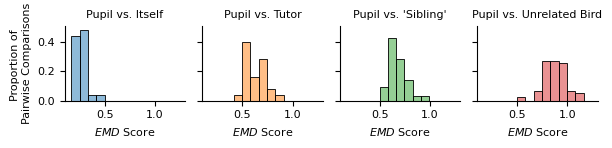

In [22]:
plt.figure(figsize = (3, 2))
g = sns.displot(rock_full, x = 'EMD', col = 'comparison_type', hue = 'comparison_type', alpha = 0.5,
                 stat = 'probability', common_norm = False, bins = 12, legend=False, height = 1.5, aspect = 1 ) 
g.set_axis_labels("$EMD$ Score", "Proportion of \nPairwise Comparisons")
g.set_titles("{col_name}");
plt.xlim(0.1, 1.3)
plt.savefig('rock_emds_across_comparisons.svg')

In [27]:
rock_full.comparison_type = rock_full.comparison_type.cat.rename_categories(cat_dict)

c:\Users\tkoch\anaconda3\envs\avn4_install_test\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x300 with 0 Axes>

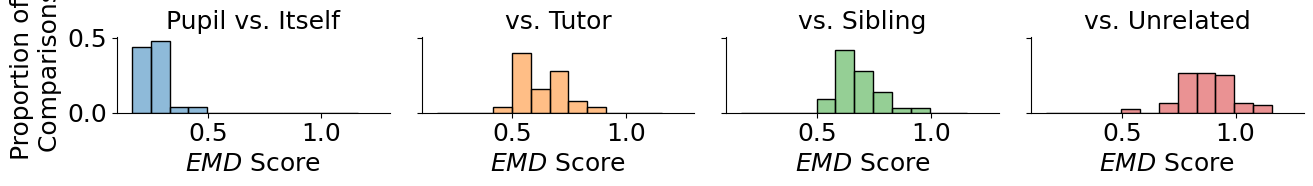

In [34]:
plt.figure(figsize = (6, 3))
g = sns.displot(rock_full, x = 'EMD', col = 'comparison_type', hue = 'comparison_type', alpha = 0.5,
                 stat = 'probability', common_norm = False, bins = 12, legend=False, height = 2.2, aspect = 1.5  ) 
g.set_axis_labels("$EMD$ Score", "Proportion of \n Comparisons")
g.set_titles("{col_name}");
plt.xlim(0.1, 1.3)
plt.savefig('poster_rock_emd_distributions.svg', transparent = True)

In [43]:
rock_full.groupby('comparison_type').count()

,Bird_ID,Comparison_Bird_ID,Tutor_ID,Same_tut,Tutor-pupil,Self_comparison,EMD
comparison_type,,,,,,,
Pupil vs. Itself,25,25,25,25,25,25,25
Pupil vs. Tutor,25,25,25,25,25,25,25
Pupil vs. 'Sibling',64,64,64,64,64,64,64
Pupil vs. Unrelated Bird,75,75,75,75,75,75,75


## Compare Tutor-Pupil Similarity Scores

In [40]:
utsw_typical_emds = utsw_typical[utsw_typical.comparison_type == 'Pupil vs. Tutor'].EMD.to_list()
utsw_fp1_emds = utsw_fp1[utsw_fp1.comparison_type == 'Pupil vs. Tutor'].EMD.to_list()
rock_emds = rock_full[rock_full.comparison_type == 'Pupil vs. Tutor'].EMD.to_list()

In [41]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [42]:
fvalue, pvalue = f_oneway(utsw_typical_emds, utsw_fp1_emds,  rock_emds)
print(fvalue, pvalue)

18.635459792183706 5.924718171268832e-07


In [26]:
utsw_typical_emds = pd.DataFrame({'EMD' : utsw_typical_emds, 
                                  'Group' : 'UTSW Typical'})
utsw_fp1_emds = pd.DataFrame({'EMD' : utsw_fp1_emds, 
                                  'Group' : 'UTSW FP1'})
rock_emds = pd.DataFrame({'EMD' : rock_emds, 
                                  'Group' : 'Rockefeller Typical'})

full_tut_pup_emds = pd.concat([utsw_typical_emds, rock_emds, utsw_fp1_emds,])

In [31]:
full_tut_pup_emds.groupby('Group').count()

,EMD
Group,
Rockefeller Typical,25
UTSW FP1,5
UTSW Typical,30


In [32]:
tukey = pairwise_tukeyhsd(endog = full_tut_pup_emds['EMD'], 
                          groups = full_tut_pup_emds['Group'], 
                          alpha = 0.05)

print(tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
       group1          group2    meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------------
Rockefeller Typical     UTSW FP1   0.3242    0.0  0.1942  0.4541   True
Rockefeller Typical UTSW Typical   0.0225 0.7319 -0.0493  0.0943  False
           UTSW FP1 UTSW Typical  -0.3016    0.0 -0.4297 -0.1735   True
-----------------------------------------------------------------------


In [33]:
plt.rcParams.update({'font.size' : 11})

Text(0.5, 1.0, 'Tutor Pupil Dissimiarity Scores')

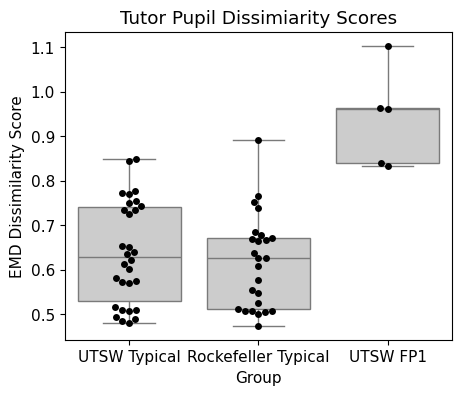

In [34]:
plt.figure(figsize=(5, 4))
sns.boxplot(data = full_tut_pup_emds, x = 'Group', y = 'EMD', color = '0.8')
sns.swarmplot(data = full_tut_pup_emds, x = 'Group', y = 'EMD', color = 'black', s = 5)
plt.ylabel('EMD Dissimilarity Score')
plt.title('Tutor Pupil Dissimiarity Scores')

In [43]:
utsw_typical_emds = pd.DataFrame({'EMD' : utsw_typical_emds, 
                                  'Group' : 'UTSW\nTypical'})
utsw_fp1_emds = pd.DataFrame({'EMD' : utsw_fp1_emds, 
                                  'Group' : 'UTSW\nFP1'})
rock_emds = pd.DataFrame({'EMD' : rock_emds, 
                                  'Group' : 'Rockefeller\nTypical'})

full_tut_pup_emds = pd.concat([utsw_typical_emds, rock_emds, utsw_fp1_emds,])

C:\Users\tkoch\AppData\Local\Temp\ipykernel_28304\633945704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data = full_tut_pup_emds, x = 'Group', y = 'EMD', color = 'black', s = 8, marker = "$\circ$",


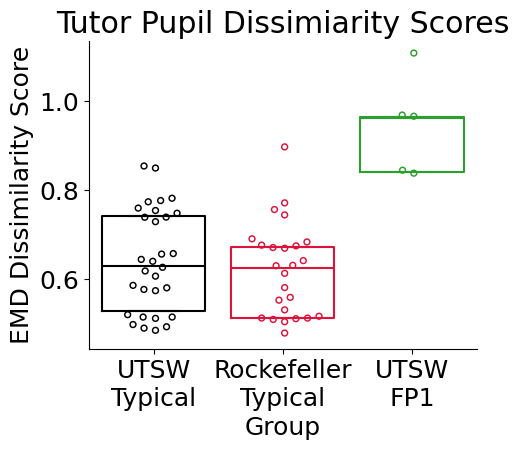

In [83]:
plt.figure(figsize=(5, 4))
sns.boxplot(data = full_tut_pup_emds, x = 'Group', y = 'EMD',fill = False, hue = 'Group', fliersize=0, whis = 0, 
            palette = ['black', 'crimson', sns.color_palette()[2]])
sns.swarmplot(data = full_tut_pup_emds, x = 'Group', y = 'EMD', color = 'black', s = 8, marker = "$\circ$",
              legend = False, palette = ['black', 'crimson', sns.color_palette()[2]])
plt.ylabel('EMD Dissimilarity Score')
plt.title('Tutor Pupil Dissimiarity Scores')
sns.despine()
plt.savefig('poster_group_comparison_emds.svg')

In [37]:
plt.rcParams.update({'font.size' : 8})

C:\Users\tkoch\AppData\Local\Temp\ipykernel_27684\4240127207.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data = full_tut_pup_emds, x = 'Group', y = 'EMD', color = 'black', s = 5, marker = "$\circ$",
c:\Users\tkoch\anaconda3\envs\avn4_install_test\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


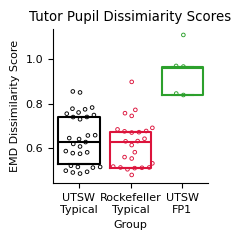

In [46]:
plt.figure(figsize=(2, 2))
sns.boxplot(data = full_tut_pup_emds, x = 'Group', y = 'EMD',fill = False, hue = 'Group', fliersize=0, whis = 0, 
            palette = ['black', 'crimson', sns.color_palette()[2]])
sns.swarmplot(data = full_tut_pup_emds, x = 'Group', y = 'EMD', color = 'black', s = 5, marker = "$\circ$",
              legend = False, palette = ['black', 'crimson', sns.color_palette()[2]])
plt.ylabel('EMD Dissimilarity Score')
plt.title('Tutor Pupil Dissimiarity Scores')
sns.despine()
plt.savefig('tut_pup_emd_across_groups.svg', transparent = True)

## Calculate Contrast Indices

In [47]:
from scipy.stats import sem

In [48]:
utsw_typical_ci_df = pd.DataFrame(utsw_typical.groupby(['Bird_ID', 'comparison_type'])['EMD'].mean()).reset_index().pivot(index = 'Bird_ID', columns = 'comparison_type', values = 'EMD')

In [49]:
utsw_typical_ci_df['contrast_index'] = -(utsw_typical_ci_df['Pupil vs. Itself'] - utsw_typical_ci_df['Pupil vs. Unrelated Bird']) / (utsw_typical_ci_df['Pupil vs. Itself'] + utsw_typical_ci_df['Pupil vs. Unrelated Bird'])

In [50]:
utsw_typical_ci_df.contrast_index.mean()

0.5207676518323323

In [51]:
sem(utsw_typical_ci_df.contrast_index)

0.018617774906177824

In [52]:
rock_typical_ci_df = pd.DataFrame(rock_full.groupby(['Bird_ID', 'comparison_type'])['EMD'].mean()).reset_index().pivot(index = 'Bird_ID', columns = 'comparison_type', values = 'EMD')

In [53]:
rock_typical_ci_df['contrast_index'] = -(rock_typical_ci_df['Pupil vs. Itself'] - rock_typical_ci_df['Pupil vs. Unrelated Bird']) / (rock_typical_ci_df['Pupil vs. Itself'] + rock_typical_ci_df['Pupil vs. Unrelated Bird'])

In [54]:
rock_typical_ci_df.contrast_index.mean()

0.547570973183669

In [55]:
sem(rock_typical_ci_df.contrast_index)

0.016887191699768163

The contrast index reported in Manderlblat-Cerf & Fee 2014 was 0.41 for their acoustic similarity scoring system, and 0.156 for SAP (however, this was comparing a randomly selected window with the length of 2 motifs in the pupil song, compared to one motif in the tutor song which is not how SAP is intended to be used). 

In [63]:
rock_typical_ci_df['Colony'] = 'Rockefeller'
utsw_typical_ci_df['Colony'] = 'UTSW'

ci_df = pd.concat([utsw_typical_ci_df, rock_typical_ci_df])

Text(0.5, 1.0, 'Contrast Indices for Typical Zebra Finches')

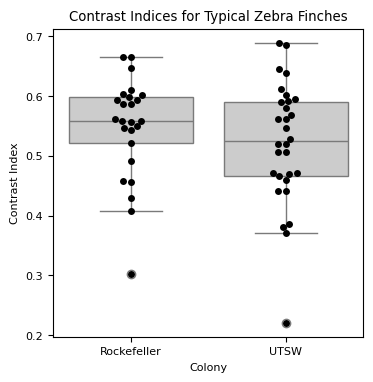

In [57]:
plt.figure(figsize=(4, 4))
sns.boxplot(data = ci_df, x = 'Colony', y = 'contrast_index', color = '0.8')
sns.swarmplot(data = ci_df, x = 'Colony', y = 'contrast_index', color = 'black', s = 5)
plt.ylabel('Contrast Index')
plt.title('Contrast Indices for Typical Zebra Finches')

In [ ]:
plt.rcParams.update({'font.size' : 8})

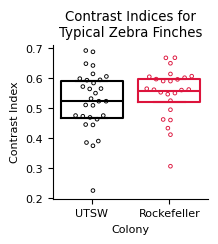

In [81]:
plt.figure(figsize=(2, 2))
sns.boxplot(data = ci_df, x = 'Colony', y = 'contrast_index', hue = 'Colony', palette = ['black', 'crimson'], 
            fill = None, fliersize=0, whis= 0, 
            legend = False)
sns.swarmplot(data = ci_df, x = 'Colony', y = 'contrast_index', hue = 'Colony', palette = ['black', 'crimson'], s = 5, 
              marker = "$\circ$")
plt.ylabel('Contrast Index')
plt.title('Contrast Indices for\nTypical Zebra Finches')
sns.despine()
plt.savefig('contrast_index_across_colonies.svg', transparent = True)

In [35]:
from scipy.stats import ttest_ind

In [36]:
ttest_ind(utsw_typical_ci_df.contrast_index.to_list(), 
          rock_typical_ci_df.contrast_index.to_list())

Ttest_indResult(statistic=-1.0480889768183572, pvalue=0.29935376622404886)

No significant difference between the contrast indices for birds at UTSW vs at Rockefeller. 

## Comparison to Human Similarity Scores

In [2]:
import pandas as pd

In [8]:
sap_scores = pd.read_csv("C:/Grad_School/Code_and_software/Py_code/similarity_scoring/tutor_pupil_dataset/Similarity_Scores.csv")
EMD_scores = pd.read_csv(dir_path + "54_emd_Dec_4_01_emds_wseg.csv")
human_scores = pd.read_csv("C:/Grad_School/Code_and_software/R_code/FoxP1_Human_Scoring_analysis/Human scoring averaged by tuttee.csv")

In [10]:
EMD_scores = EMD_scores[EMD_scores['Tutor-pupil'] == True]

In [11]:
mean_sap_scores = sap_scores.groupby("Bird ID")["%Similarity"].mean()

In [12]:
merged_sap_scores = pd.merge(left = EMD_scores, right = mean_sap_scores, left_on = "Bird_ID", right_on = "Bird ID")

In [13]:
all_merged = pd.merge(left = merged_sap_scores[["Bird_ID", "Tutor_ID", "EMD", "%Similarity",]], right = human_scores[["Bird_2", "mean_score", "Comparison_type"]], 
                     left_on = "Bird_ID", right_on = "Bird_2")

In [14]:
all_merged

,Bird_ID,Tutor_ID,EMD,%Similarity,Bird_2,mean_score,Comparison_type
0,G402,O314,0.581091,87.325000,G402,5.159091,tut_pre_FoxP1_v_tut
1,R402,O314,0.652488,73.914894,R402,4.982323,tut_pre_FoxP1_v_tut
2,B447,B181,0.506988,59.100000,B447,7.232323,tut_pre_FoxP1_v_tut
3,S389,B308,0.521639,72.023810,S389,4.765152,tut_post_FoxP1_v_tut
4,Y389,B308,0.963579,67.457627,Y389,1.242424,tut_post_FoxP1_v_tut
5,O421,B308,0.960880,43.700000,O421,1.234848,tut_post_FoxP1_v_tut
6,S421,B308,1.102812,52.375000,S421,0.876263,tut_post_FoxP1_v_tut
7,B402,B308,0.833040,51.393443,B402,2.782828,tut_post_FoxP1_v_tut
8,Y433,B308,0.601753,64.977778,Y433,5.371212,tut_post_GFP_v_tut
9,O434,B308,0.639380,84.317073,O434,5.861111,tut_post_GFP_v_tut


In [73]:
from scipy.stats import pearsonr

In [74]:
r_sap, p_sap = pearsonr(all_merged['%Similarity'], all_merged['mean_score'])
print(r_sap)
print(p_sap)

0.3266946758680167
0.23464591437187976


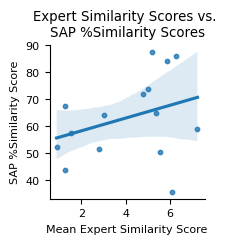

In [80]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(2,2))
sns.regplot(data = all_merged, x = "mean_score", y = "%Similarity", scatter_kws={'s':10} )
plt.title("Expert Similarity Scores vs. \nSAP %Similarity Scores")
plt.xlabel("Mean Expert Similarity Score")
plt.ylabel("SAP %Similarity Score")
sns.despine()
plt.savefig('sap vs. human correlation.svg', transparent = True)
#plt.annotate("$r$ = %.3f" % r_sap, xy = (1, 85), fontsize = 14)

In [82]:
r_emd, p_emd = pearsonr(all_merged['EMD'], all_merged['mean_score'])
print(r_emd)
print(p_emd)

-0.8724218819496165
2.21492709072025e-05


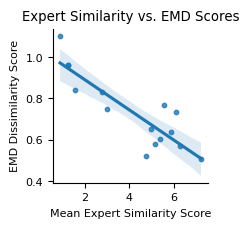

In [87]:
plt.rcParams.update({'font.size': 8})

plt.figure(figsize=(2, 2))
sns.regplot(data = all_merged, x = "mean_score", y = "EMD", scatter_kws={'s':10})
plt.title("Expert Similarity vs. EMD Scores")
plt.xlabel("Mean Expert Similarity Score")
plt.ylabel("EMD Dissimilarity Score")
sns.despine()
plt.savefig('emd_vs_expert_correlation.svg', transparent = True)
#plt.annotate("$r$ = %.3f" % r_emd, xy = (5, 1.05), fontsize = 14)

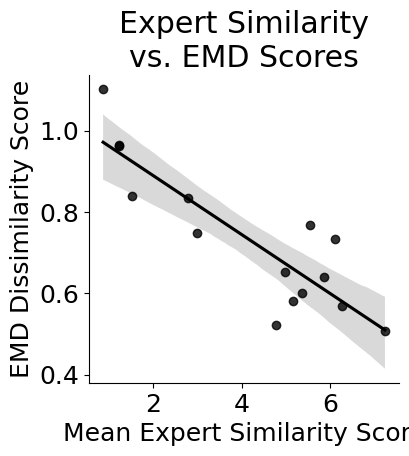

In [81]:
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(4,4))
sns.regplot(data = all_merged, x = "mean_score", y = "EMD", color = 'Black')
plt.title("Expert Similarity\nvs. EMD Scores")
plt.xlabel("Mean Expert Similarity Score")
plt.ylabel("EMD Dissimilarity Score")
sns.despine()
plt.savefig('poster_emd_vs_human.svg', transparent = True)